In [1]:
# !pip install --upgrade numpy scikit-learn

Ideia: manter o máximo de reservas possível.

Modelo para indentificar quem via manter ou cancelar a reserva.

Ação para reter os cliente

## Análise de Dados

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/KennedyRMenezes/DataScience/refs/heads/master/Estudos/Alura/Classifica%C3%A7%C3%A3o/5.selecionando-features/hotel.csv")

In [4]:
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Aviation,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,booking_status
0,2,0,2,2,0,82,2018,10,30,0,...,0,0,0,0,0,0,0,0,1,0
1,2,0,0,1,0,109,2017,7,16,0,...,0,0,0,0,0,0,0,0,1,1
2,2,0,0,1,0,105,2018,4,6,0,...,0,0,0,0,0,0,0,1,0,1
3,1,0,0,3,0,13,2018,4,19,0,...,0,0,0,0,1,0,0,0,0,0
4,2,0,0,2,0,81,2018,8,5,0,...,1,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34141,2,0,1,2,0,305,2018,11,4,0,...,0,0,0,0,0,0,0,1,0,1
34142,2,0,0,3,0,67,2018,9,28,0,...,0,0,0,0,0,0,0,0,1,1
34143,1,0,0,2,0,193,2018,6,20,0,...,0,0,0,0,0,0,0,0,1,1
34144,2,0,2,1,0,85,2017,7,5,0,...,0,0,0,0,0,0,0,0,1,1


In [5]:
df.isnull().sum().sum() # não temos valores nulos

np.int64(0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34146 entries, 0 to 34145
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          34146 non-null  int64  
 1   no_of_children                        34146 non-null  int64  
 2   no_of_weekend_nights                  34146 non-null  int64  
 3   no_of_week_nights                     34146 non-null  int64  
 4   required_car_parking_space            34146 non-null  int64  
 5   lead_time                             34146 non-null  int64  
 6   arrival_year                          34146 non-null  int64  
 7   arrival_month                         34146 non-null  int64  
 8   arrival_date                          34146 non-null  int64  
 9   repeated_guest                        34146 non-null  int64  
 10  no_of_previous_cancellations          34146 non-null  int64  
 11  no_of_previous_

In [7]:
X = df.drop(['booking_status'], axis=1)
y = df['booking_status']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, random_state=50, test_size=0.3, stratify=y)

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
modelo = RandomForestClassifier(random_state=2)

In [12]:
modelo.fit(X_treino, y_treino)

RandomForestClassifier(random_state=2)

In [13]:
modelo.score(X_teste, y_teste)

0.920636470128856

In [14]:
df['booking_status'].value_counts()

,count
booking_status,
0,17073
1,17073


Ao eliminar features eu consigo manter a performance do modelo?

In [15]:
import seaborn as sns

<Axes: xlabel='booking_status', ylabel='arrival_month'>

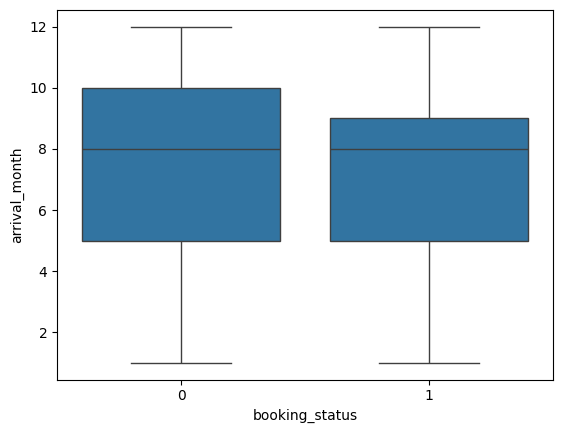

In [16]:
sns.boxplot(X_treino, x=y_treino, y='arrival_month')

<Axes: xlabel='booking_status', ylabel='arrival_month'>

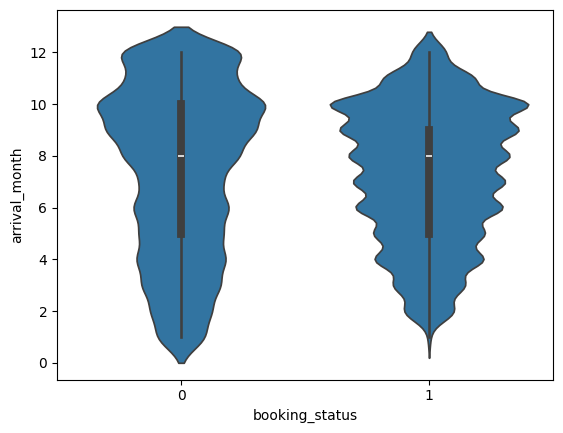

In [17]:
sns.violinplot(X_treino, x=y_treino, y='arrival_month')

<Axes: xlabel='booking_status', ylabel='lead_time'>

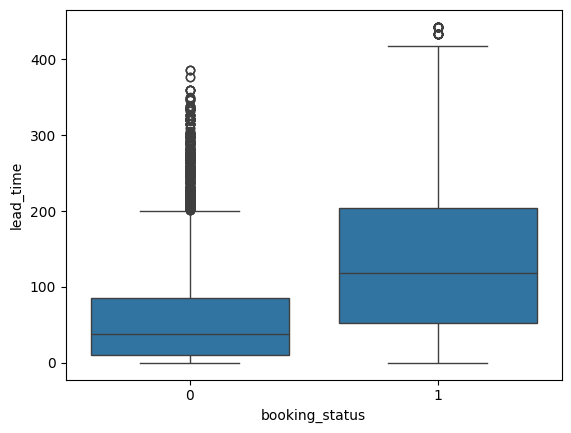

In [18]:
sns.boxplot(X_treino, x=y_treino, y='lead_time')

#### Correlação entre features

In [19]:
import matplotlib.pyplot as plt

In [20]:
corr = pd.concat([X_treino, y_treino], axis=1).corr()

<Axes: >

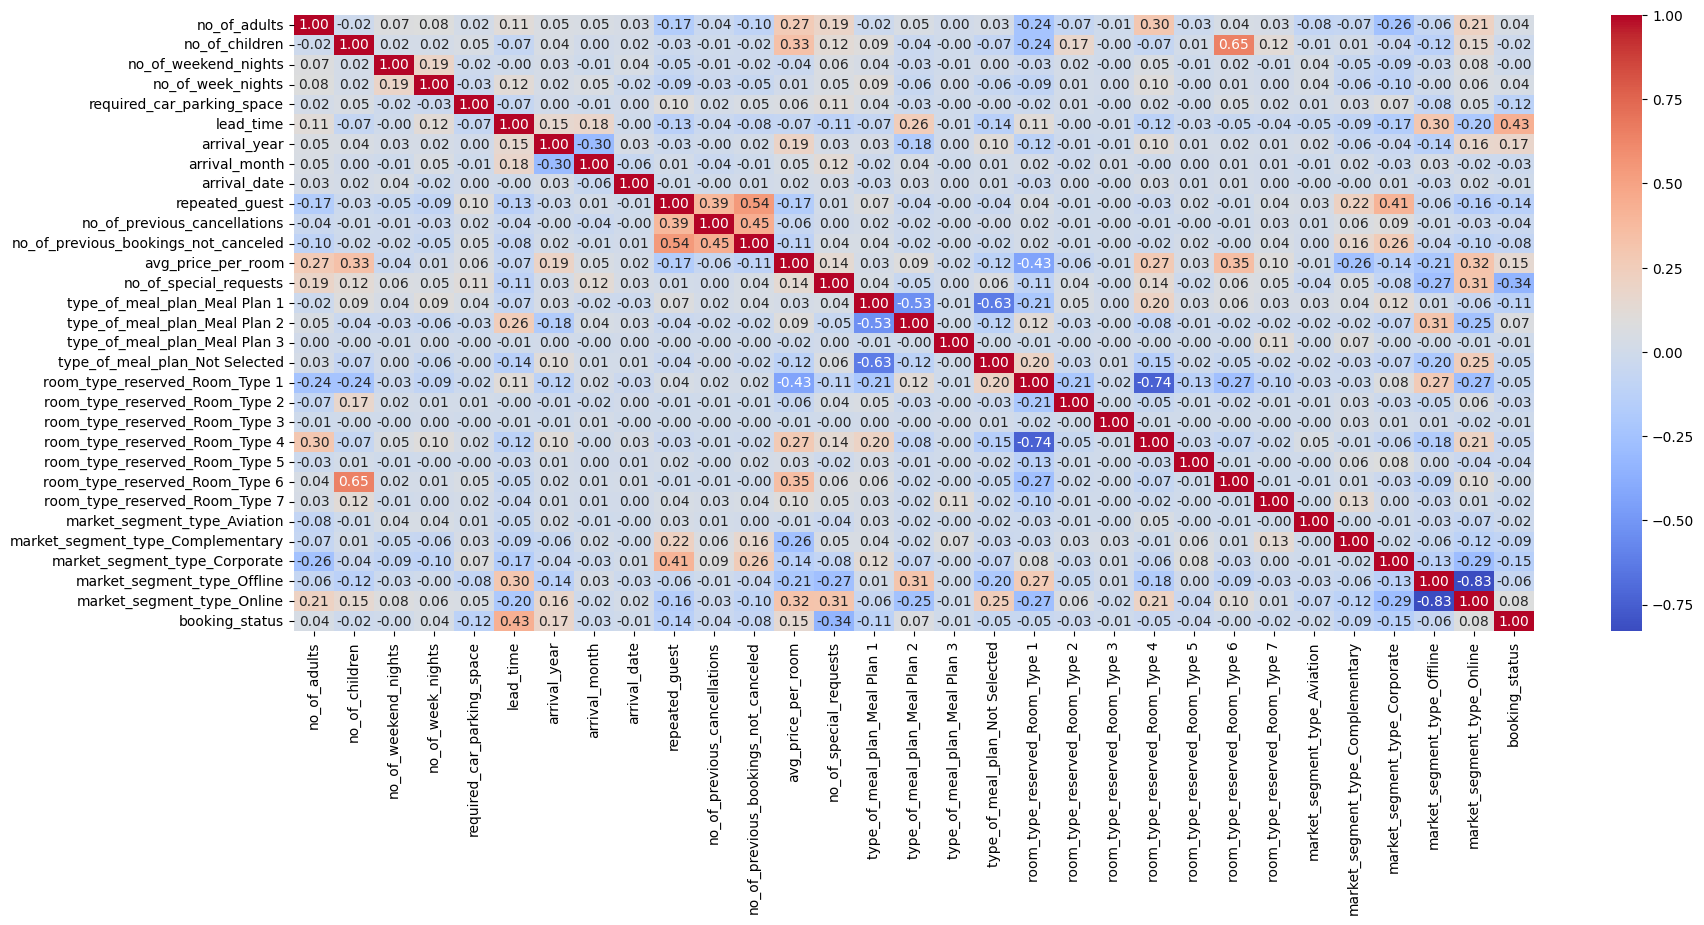

In [21]:
plt.figure(figsize=(20,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')

#### Importância das features

In [22]:
modelo = RandomForestClassifier(random_state=2)

In [23]:
modelo.fit(X_treino, y_treino)

RandomForestClassifier(random_state=2)

In [24]:
importancia = pd.DataFrame({'colunas': X_treino.columns, 'importancia': modelo.feature_importances_})
importancia.sort_values(by='importancia', ascending=False).head(10)

,colunas,importancia
5,lead_time,0.283828
13,no_of_special_requests,0.137130
12,avg_price_per_room,0.137018
7,arrival_month,0.085598
8,arrival_date,0.082394
3,no_of_week_nights,0.047354
2,no_of_weekend_nights,0.031755
28,market_segment_type_Offline,0.029749
6,arrival_year,0.023609
29,market_segment_type_Online,0.022976


Ajuste do modelo de machine learning fica equivalente se usarmos apenas as x (no nosso caso vimos as 10) features mais importantes?

Como automatizar para escolher as features mais importantes?

#### SelectFromModel

In [25]:
from sklearn.feature_selection import SelectFromModel

In [26]:
modelo_fsel = SelectFromModel(modelo, max_features=10, prefit=True)

In [29]:
X_treino_sel = modelo_fsel.transform(X_treino)
X_teste_sel = modelo_fsel.transform(X_teste)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [30]:
modelo = RandomForestClassifier(random_state=2)

In [31]:
modelo.fit(X_treino_sel, y_treino)

RandomForestClassifier(random_state=2)

In [32]:
modelo.score(X_teste_sel, y_teste)

0.8976962124170246

Score se mantem alto mesmo com menos features o que pode ser interessante.

#### Validação Cruzada

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
model = RandomForestClassifier(random_state=2)

In [35]:
parametros_busca = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10,20],
    'min_samples_split':[2,5],
    'min_samples_leaf':[1,2]
}

In [36]:
grid_search = GridSearchCV(estimator=modelo,
                           param_grid=parametros_busca,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1)

In [37]:
grid_search.fit(X_treino, y_treino)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=2), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [38]:
grid_search.cv_results_

{'mean_fit_time': array([ 6.34213243, 12.47126236, 16.85427165,  6.49672294, 11.43134704,
        13.00704317,  3.83593583,  6.76206608, 10.74104395,  3.57296515,
        11.63240056, 20.8364378 ,  3.24941978,  7.9428082 ,  7.89354963,
         2.06001673,  4.77737312,  7.55597854,  2.28114591,  4.71941886,
         6.90498152,  2.69998093,  4.62730041,  7.0529604 ,  3.87621741,
         8.13870897, 12.92580652,  5.98681302, 13.75187263, 17.76969485,
         5.11894379,  7.13916807, 13.49779816,  3.25547371,  9.54230223,
        15.45684538]),
 'std_fit_time': array([0.97862913, 0.23276952, 4.19417025, 1.02091784, 0.70673282,
        1.38840631, 0.57871779, 0.48095329, 0.4495984 , 0.56691482,
        2.22137402, 3.15258006, 0.59151803, 1.56825355, 1.59209457,
        0.05511506, 0.7057575 , 0.75639397, 0.30074299, 0.63294442,
        0.74356515, 0.55130036, 0.49172812, 0.63312099, 0.69283843,
        1.34981507, 2.22968496, 0.63770306, 2.23159688, 1.29477233,
        1.10629063, 1.042

In [39]:
modelo_fsel = SelectFromModel(grid_search.best_estimator_, max_features=10, prefit=True)

In [40]:
X_treino_sel = modelo_fsel.transform(X_treino)
X_teste_sel = modelo_fsel.transform(X_teste)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [41]:
modelo = grid_search.best_estimator_

In [42]:
modelo.fit(X_treino_sel, y_treino)

RandomForestClassifier(n_estimators=300, random_state=2)

Usando conjunto de testes

In [43]:
modelo.score(X_teste_sel, y_teste)

0.8973057399453338

#### Matriz de confusão

In [49]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

In [45]:
y_pred = modelo.predict(X_teste_sel)

In [46]:
matriz_confusao = confusion_matrix(y_teste, y_pred)

<Axes: >

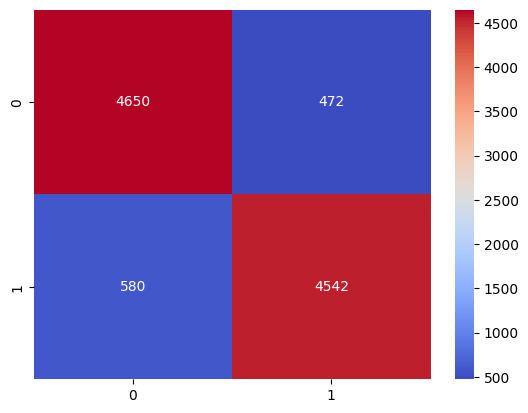

In [47]:
sns.heatmap(matriz_confusao, annot=True, cmap='coolwarm', fmt='d')
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Real')

#### Curva ROC

In [50]:
fpr, tpr, treshoulds = roc_curve(y_teste, y_pred)

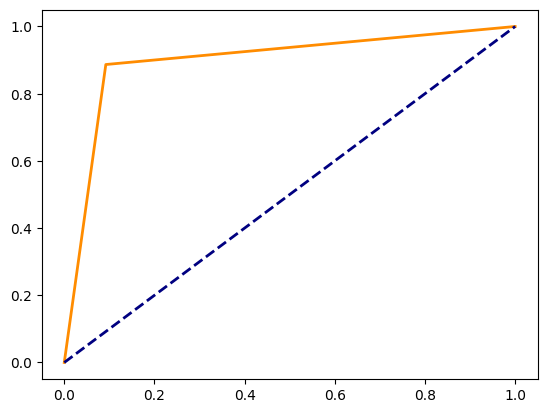

In [52]:
plt.plot(fpr, tpr, color='darkorange', lw=2)
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')

In [53]:
roc_auc = auc(fpr, tpr)

In [54]:
roc_auc

np.float64(0.8973057399453339)

#### Seleção com RFE

In [55]:
from sklearn.feature_selection import RFE

In [56]:
grid_search.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [57]:
parametros = {'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300,
 'random_state':2}

In [58]:
modelo = RandomForestClassifier(**parametros)

In [59]:
selecionador = RFE(modelo, n_features_to_select=10, step=1)

In [60]:
selecionador.fit(X_treino, y_treino)

RFE(estimator=RandomForestClassifier(n_estimators=300, random_state=2),
    n_features_to_select=10)

In [65]:
X_treino_sel = selecionador.transform(X_treino)
X_teste_sel = selecionador.transform(X_teste)

In [66]:
modelo.fit(X_treino_sel, y_treino)

RandomForestClassifier(n_estimators=300, random_state=2)

In [67]:
modelo.score(X_teste_sel, y_teste)

0.9126317844591956

In [69]:
 y_pred = modelo.predict(X_teste_sel)

In [71]:
conf = confusion_matrix(y_teste, y_pred)

<Axes: >

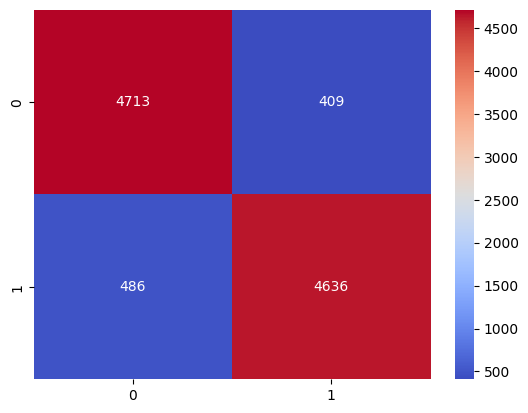

In [72]:
sns.heatmap(conf, annot=True, cmap='coolwarm', fmt='d')

🧠 1. RFE (Recursive Feature Elimination)
Como funciona:

- RFE elimina recursivamente as variáveis menos importantes.

- Ele treina um modelo várias vezes, removendo a cada iteração a variável (ou um conjunto delas) com menor importância.

- O processo continua até restar um número desejado de variáveis.

Pontos-chave:

- Mais custoso computacionalmente, pois treina o modelo repetidas vezes.

- Ideal quando você quer um número fixo de variáveis e está disposto a gastar mais tempo para escolher as melhores.

🧠 2. SelectFromModel
Como funciona:

- Usa a importância das variáveis calculada por um modelo (como coef_ de uma regressão ou feature_importances_ de uma árvore).

- Seleciona as variáveis com importância acima de um certo limiar (threshold).

Pontos-chave:

- Mais rápido que RFE: treina o modelo apenas uma vez.

- Pode ser menos preciso, já que não há processo iterativo de eliminação.

- Permite selecionar variáveis com base em importância absoluta ou relativa.

#### Seleção com RFECV

versão mais elaborada do RFE com Validação Cruzada

In [73]:
modelo = RandomForestClassifier(**parametros)

In [75]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

In [76]:
cv = StratifiedKFold(5, shuffle=True, random_state=500)

In [79]:
rfecv = RFECV(estimator=modelo,
              step=1,
              cv=cv,
              scoring='roc_auc',
              min_features_to_select=1,
              importance_getter='auto'
              )

In [80]:
rfecv.fit(X_treino, y_treino)

RFECV(cv=StratifiedKFold(n_splits=5, random_state=500, shuffle=True),
      estimator=RandomForestClassifier(n_estimators=300, random_state=2),
      scoring='roc_auc')

In [81]:
print(f'O numero ideal de features é: {rfecv.n_features_}')

O numero ideal de features é: 25


In [84]:
print(f'O ranking das features é: {rfecv.ranking_}')

O ranking das features é: [1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 6 1 1 1 5 1 1 1 4 2 1 1 1 1]


In [85]:
print(f'Score: {rfecv.cv_results_}')

Score: {'mean_test_score': array([0.76154345, 0.87839775, 0.90458683, 0.94491056, 0.95526299,
       0.95713147, 0.96172095, 0.9619459 , 0.96508946, 0.96545119,
       0.96600555, 0.96636283, 0.96654828, 0.96653068, 0.96700983,
       0.96842023, 0.96922436, 0.96933057, 0.96897245, 0.96914412,
       0.96911669, 0.96916082, 0.96924454, 0.96912505, 0.96992768,
       0.96991859, 0.96983684, 0.96988479, 0.96954651, 0.96953734]), 'std_test_score': array([0.02230485, 0.00513526, 0.00256538, 0.00215576, 0.00235998,
       0.00214142, 0.00143015, 0.00134581, 0.0012676 , 0.00140743,
       0.001545  , 0.00160935, 0.00118657, 0.00139523, 0.00150719,
       0.00162719, 0.00170077, 0.00154041, 0.00171934, 0.00164235,
       0.00144254, 0.00143644, 0.00120112, 0.00121457, 0.00127118,
       0.00121897, 0.00149984, 0.00099933, 0.00123228, 0.00116114]), 'split0_test_score': array([0.77913523, 0.88305492, 0.90862325, 0.94651964, 0.95776255,
       0.95994017, 0.96338291, 0.96326103, 0.96628728, 0.96

In [86]:
y_pred = rfecv.predict(X_teste)

In [87]:
matriz_confusao = confusion_matrix(y_teste, y_pred)

<Axes: >

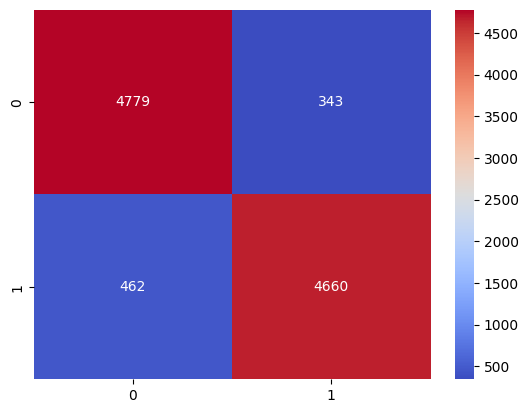

In [88]:
sns.heatmap(matriz_confusao, annot=True, cmap='coolwarm', fmt='d')

#### Visualização dos resultados

In [89]:
resultado = rfecv.cv_results_

In [90]:
resultado['mean_test_score']

array([0.76154345, 0.87839775, 0.90458683, 0.94491056, 0.95526299,
       0.95713147, 0.96172095, 0.9619459 , 0.96508946, 0.96545119,
       0.96600555, 0.96636283, 0.96654828, 0.96653068, 0.96700983,
       0.96842023, 0.96922436, 0.96933057, 0.96897245, 0.96914412,
       0.96911669, 0.96916082, 0.96924454, 0.96912505, 0.96992768,
       0.96991859, 0.96983684, 0.96988479, 0.96954651, 0.96953734])

In [91]:
results_df = pd.DataFrame({'Valores': resultado['mean_test_score']})

<Axes: xlabel='None', ylabel='Valores'>

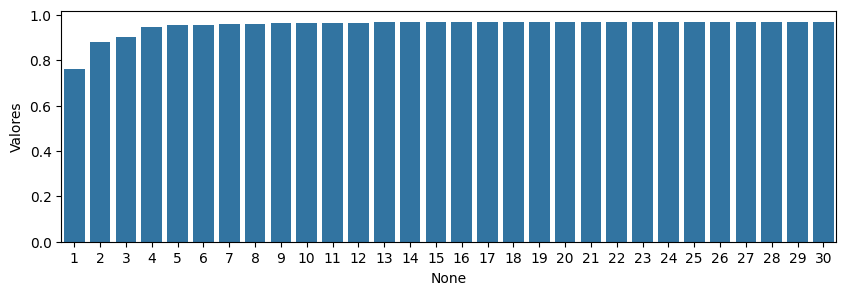

In [95]:
plt.figure(figsize=(10,3))
sns.barplot(x=results_df.index+1, y='Valores', data=results_df)

Apesar do ideal ser 25 features como RFECV indicou, um número menor de features explica o modelo suficientemente bem, como pode ser visto no gráfico. Acima de 6 features já é um bom resultado.

Ou seja, se houver algum limitação de busca de informações o modelo ele ainda pode ser bem explicado.